In [1]:
import pandas as pd
import re
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
fight_data = pd.read_csv('../feature_engineered_fight.csv')
fight_data.head()

,method,referee,weightclass,winner,f1,f2,f1_slmp,f2_slmp,f1_str_acc_%,f2_str_acc_%,...,f1_sub_avg,f2_sub_avg,f1_height,f2_height,f1_weight,f2_weight,f1_reach,f2_reach,f1_stance,f2_stance
0,Decision - Unanimous,Herb Dean,featherweight,f1,Lerone Murphy,Edson Barboza,8.80,3.16,60.44,32.64,...,0.00,0.0,175.26,180.34,65.77,65.77,185.42,190.50,Orthodox,Orthodox
1,KO/TKO,Dan Miragliotta,welterweight,f1,Khaos Williams,Carlston Harris,8.00,9.33,60.00,46.67,...,0.00,0.0,182.88,182.88,77.11,77.11,195.58,193.04,Orthodox,Orthodox
2,Decision - Unanimous,Mark Smith,welterweight,f1,Themba Gorimbo,Ramiz Brahimaj,2.87,0.20,82.69,50.00,...,0.00,0.0,185.42,177.80,77.11,77.11,195.58,182.88,Orthodox,Orthodox
3,KO/TKO,Chris Tognoni,bantamweight,f1,Adrian Yanez,Vinicius Salvador,12.93,6.11,64.29,50.00,...,0.00,0.0,170.18,170.18,61.23,61.23,177.80,177.80,Orthodox,Southpaw
4,Submission,Herb Dean,strawweight,f1,Angela Hill,Luana Pinheiro,3.04,1.85,35.44,28.33,...,0.11,0.0,160.02,157.48,52.16,52.16,162.56,157.48,Orthodox,Orthodox


In [3]:
# Create two dataframes by splitting the fight_data into two parts for each fighter
fighter1 = fight_data[['f1', 'f1_height', 'f1_weight', 'f1_reach', 'f1_slmp', 'f1_str_acc_%', 'f1_sapm', 'f1_str_def_%', 'f1_td_avg', 'f1_td_acc_%', 'f1_td_def_%', 'f1_sub_avg', 'f1_stance']]
fighter2 = fight_data[['f1', 'f2_height', 'f2_weight', 'f2_reach', 'f2_slmp', 'f2_str_acc_%', 'f2_sapm', 'f2_str_def_%', 'f2_td_avg', 'f2_td_acc_%', 'f2_td_def_%', 'f2_sub_avg', 'f2_stance']]

# Rename columns to match the desired columns in fighters dataframe
fighter1.columns = ['name', 'height', 'weight', 'reach', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg', 'stance']
fighter2.columns = ['name', 'height', 'weight', 'reach', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg', 'stance']

# # Concatenate the two dataframes
fighters = pd.concat([fighter1, fighter2], ignore_index=True)

# Display fighters dataframe
display(fighters)

,name,height,weight,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance
0,Lerone Murphy,175.26,65.77,185.42,8.80,60.44,3.16,67.36,2.40,66,100,0.00,Orthodox
1,Khaos Williams,182.88,77.11,195.58,8.00,60.00,9.33,53.33,0.00,0,100,0.00,Orthodox
2,Themba Gorimbo,185.42,77.11,195.58,2.87,82.69,0.20,50.00,5.00,83,88,0.00,Orthodox
3,Adrian Yanez,170.18,61.23,177.80,12.93,64.29,6.11,50.00,0.00,0,100,0.00,Orthodox
4,Angela Hill,160.02,52.16,162.56,3.04,35.44,1.85,71.67,3.26,33,86,0.11,Orthodox
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,Jerry Bohlander,175.26,86.18,179.62,0.00,0.00,3.08,50.00,0.00,0,0,0.00,Orthodox
14574,Vitor Belfort,187.96,105.69,193.07,0.78,14.29,13.25,41.38,0.00,0,100,0.00,Orthodox
14575,Scott Ferrozzo,185.42,97.52,190.38,0.37,60.00,3.73,28.57,0.00,0,0,0.00,Southpaw
14576,Yoshiki Takahashi,170.18,92.99,174.24,0.12,5.88,2.50,53.49,1.88,10,0,0.00,Orthodox


In [4]:
fighters['stance'] = fighters['stance'].replace(['Southpaw', 'Switch', 'Open Stance', 'Sideways'], 'Unorthodox')
fighters['stance'].value_counts()

stance
Orthodox      10960
Unorthodox     3618
Name: count, dtype: int64

In [5]:
cluster_data = fighters[['reach', 'stance', 'slpm', 'str_acc_%', 'sapm', 'str_def_%', 'td_avg', 'td_acc_%', 'td_def_%', 'sub_avg']]

In [6]:
cluster_data

,reach,stance,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg
0,185.42,Orthodox,8.80,60.44,3.16,67.36,2.40,66,100,0.00
1,195.58,Orthodox,8.00,60.00,9.33,53.33,0.00,0,100,0.00
2,195.58,Orthodox,2.87,82.69,0.20,50.00,5.00,83,88,0.00
3,177.80,Orthodox,12.93,64.29,6.11,50.00,0.00,0,100,0.00
4,162.56,Orthodox,3.04,35.44,1.85,71.67,3.26,33,86,0.11
...,...,...,...,...,...,...,...,...,...,...
14573,179.62,Orthodox,0.00,0.00,3.08,50.00,0.00,0,0,0.00
14574,193.07,Orthodox,0.78,14.29,13.25,41.38,0.00,0,100,0.00
14575,190.38,Unorthodox,0.37,60.00,3.73,28.57,0.00,0,0,0.00
14576,174.24,Orthodox,0.12,5.88,2.50,53.49,1.88,10,0,0.00


In [7]:
# cluster data 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load your dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

In [8]:
preprocessed_data

,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance_Unorthodox
0,0.213372,1.470068,0.884420,-0.185586,0.797903,0.259778,1.115495,0.752594,-0.318170,False
1,1.164608,1.235224,0.858132,1.625653,-0.034856,-0.538633,-0.752594,0.752594,-0.318170,False
2,1.164608,-0.270717,2.213757,-1.054511,-0.232511,1.124723,1.596669,0.412941,-0.318170,False
3,-0.500054,2.682454,1.114440,0.680403,-0.232511,-0.538633,-0.752594,0.752594,-0.318170,False
4,-1.926908,-0.220813,-0.609217,-0.570144,1.053726,0.545875,0.181451,0.356333,0.260773,False
...,...,...,...,...,...,...,...,...,...,...
14573,-0.329656,-1.113222,-2.726597,-0.209071,-0.232511,-0.538633,-0.752594,-2.077844,-0.318170,False
14574,0.929608,-0.884249,-1.872834,2.776392,-0.744156,-0.538633,-0.752594,0.752594,-0.318170,False
14575,0.677755,-1.004607,0.858132,-0.018259,-1.504502,-0.538633,-0.752594,-2.077844,-0.318170,True
14576,-0.833361,-1.077996,-2.375293,-0.379333,-0.025360,0.086789,-0.469550,-2.077844,-0.318170,False


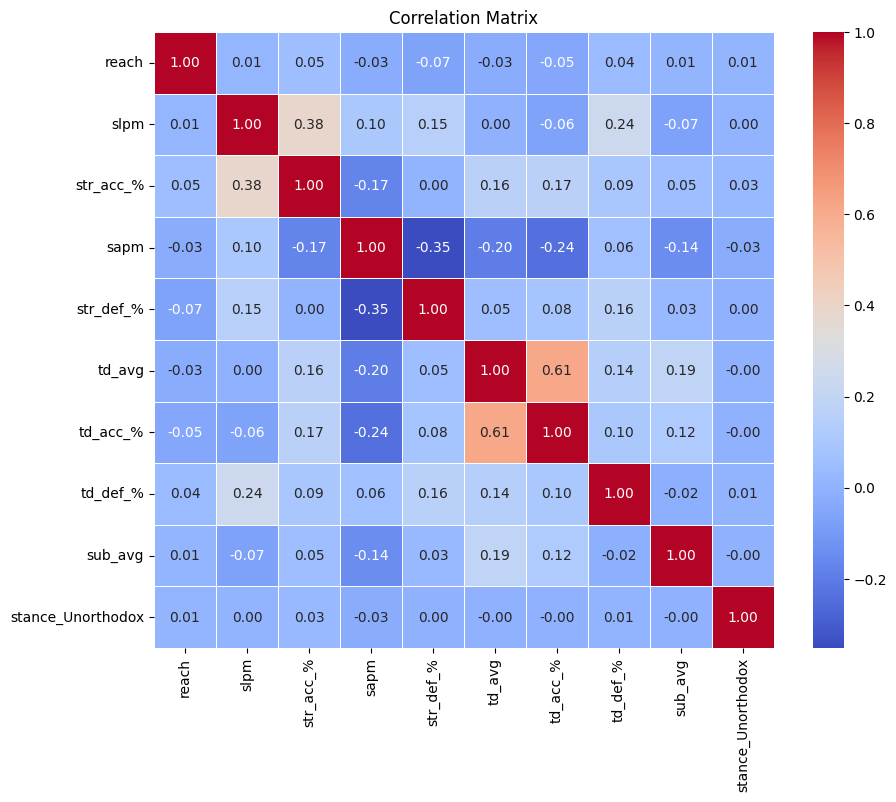

In [9]:
# Compute pairwise correlation
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

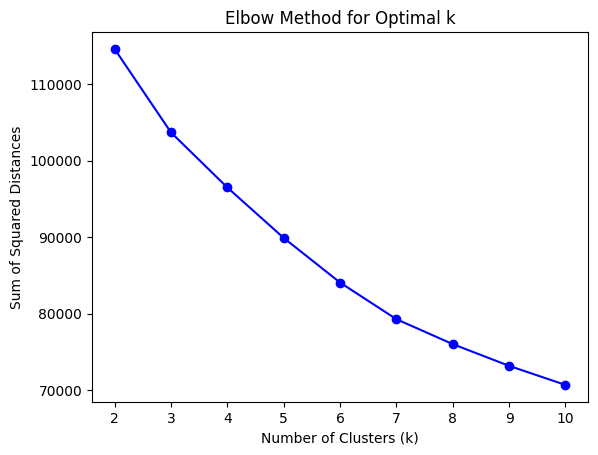

In [10]:
# Load dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

# Define range of clusters to try
k_range = range(2, 11)  # Try k from 2 to 10

# Calculate sum of squared distances for each k
ssd = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessed_data)
    ssd.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_range, ssd, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

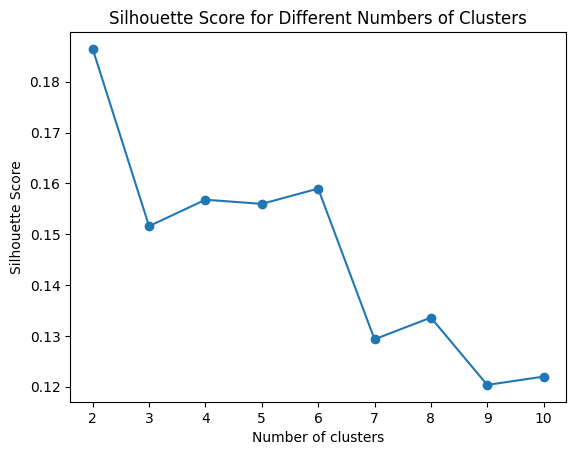

In [11]:
# Calculate silhouette score for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(preprocessed_data)
    silhouette_avg = silhouette_score(preprocessed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

> k = 6!!

In [12]:
# Load your dataset
df = cluster_data

# Preprocessing
# Perform one-hot encoding for the categorical feature
df = pd.get_dummies(df, columns=['stance'], drop_first=True)

# Separate numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X_numerical = df[numerical_features]

# Scale numerical features
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X_numerical)

# Combine scaled numerical features with encoded categorical features
preprocessed_data = pd.concat([pd.DataFrame(scaled_numerical, columns=numerical_features), df.drop(columns=numerical_features)], axis=1)

# Choose the numbe8 of clusters
num_clusters = 6

# Build the clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(preprocessed_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
fighters['cluster'] = cluster_labels

In [13]:
fighters

,name,height,weight,reach,slpm,str_acc_%,sapm,str_def_%,td_avg,td_acc_%,td_def_%,sub_avg,stance,cluster
0,Lerone Murphy,175.26,65.77,185.42,8.80,60.44,3.16,67.36,2.40,66,100,0.00,Orthodox,5
1,Khaos Williams,182.88,77.11,195.58,8.00,60.00,9.33,53.33,0.00,0,100,0.00,Orthodox,3
2,Themba Gorimbo,185.42,77.11,195.58,2.87,82.69,0.20,50.00,5.00,83,88,0.00,Orthodox,5
3,Adrian Yanez,170.18,61.23,177.80,12.93,64.29,6.11,50.00,0.00,0,100,0.00,Orthodox,4
4,Angela Hill,160.02,52.16,162.56,3.04,35.44,1.85,71.67,3.26,33,86,0.11,Orthodox,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14573,Jerry Bohlander,175.26,86.18,179.62,0.00,0.00,3.08,50.00,0.00,0,0,0.00,Orthodox,2
14574,Vitor Belfort,187.96,105.69,193.07,0.78,14.29,13.25,41.38,0.00,0,100,0.00,Orthodox,1
14575,Scott Ferrozzo,185.42,97.52,190.38,0.37,60.00,3.73,28.57,0.00,0,0,0.00,Unorthodox,2
14576,Yoshiki Takahashi,170.18,92.99,174.24,0.12,5.88,2.50,53.49,1.88,10,0,0.00,Orthodox,2


In [14]:
fighters['cluster'].value_counts()

cluster
3    5683
5    3907
2    3589
1     628
4     528
0     243
Name: count, dtype: int64

In [16]:
import pandas as pd

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Create a DataFrame to store centroids with feature names as columns
centroids_df = pd.DataFrame(centroids, columns=fighters.columns[3:-1])  # Exclude the 'cluster' column

# Transpose the DataFrame to have features as rows and clusters as columns
centroids_df = centroids_df.transpose()

# Add cluster labels as columns
centroids_df.columns = [f'Cluster {i}' for i in range(num_clusters)]

# Display the centroids DataFrame
display(centroids_df)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
reach,0.084990,0.118993,-0.057299,0.035908,0.291449,-0.063395
slpm,-0.202487,-0.012692,-0.420045,0.036683,3.374901,-0.108958
str_acc_%,0.128787,-0.603477,-0.235101,-0.139234,1.187536,0.346996
sapm,-0.609285,3.123718,-0.093780,-0.001136,0.085297,-0.387930
str_def_%,0.147685,-1.144835,-0.381939,0.224112,0.368834,0.149853
td_avg,1.083324,-0.469662,-0.322724,-0.398798,-0.301535,0.925399
td_acc_%,0.376087,-0.692650,-0.405568,-0.553532,-0.584644,1.344661
td_def_%,0.191748,0.487804,-1.397561,0.517154,0.668539,0.350892
sub_avg,5.696302,-0.305180,-0.065661,-0.195052,-0.252979,0.072987
stance,0.259259,0.232484,0.241014,0.247053,0.299242,0.251344


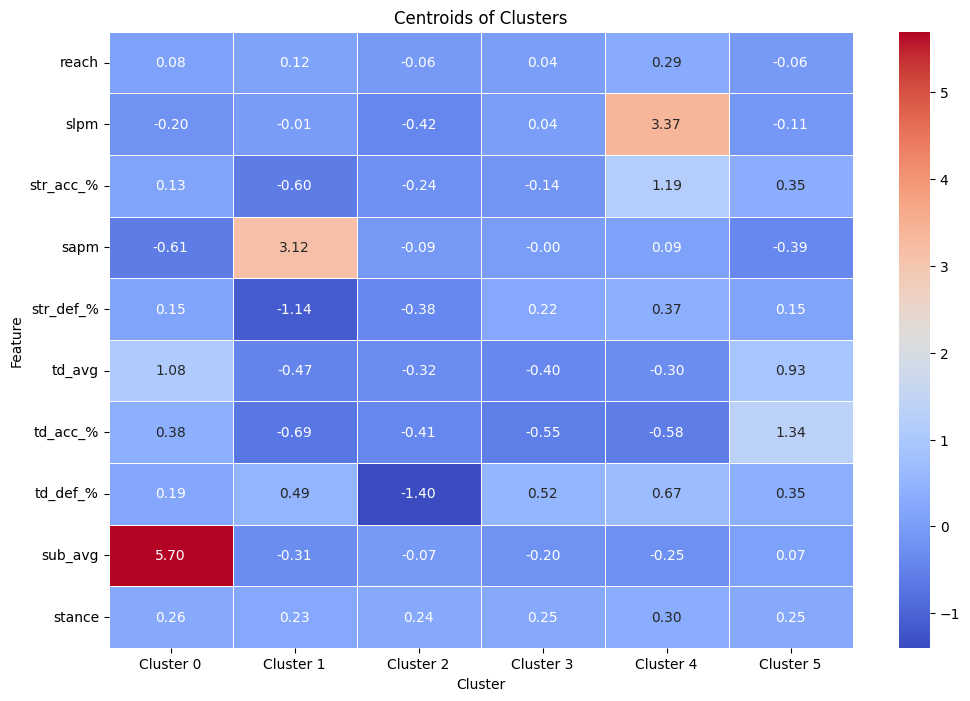

In [18]:
# Plot the centroids heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Centroids of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

| Cluster | Reach      | SLpM    | Striking Accuracy | SApM    | Striking Defense | TD Avg  | TD Acc | TD Def | Sub Avg | Stance     |
|---------|------------|---------|-------------------|---------|------------------|---------|--------|--------|---------|------------|
| 0       | Above Avg. | Below   | Above             | Below   | Above            | Above   | Average| Average| High    | Fav. Stance|
|         |            | Average | Average           | High    | Average          | Average |        |        |         |            |
| 1       | Below Avg. | Average | Below             | High    | Below            | Below   | Below  | Above  | Low     | Variety    |
|         |            |         | Average           |         |                  |         |        |        |         |            |
| 2       | Below Avg. | Low     | Below             | Below   | Below            | Below   | Below  | Below  | Low     | Fav. Stance|
|         |            |         | Average           |         |                  |         |        |        |         |            |
| 3       | Slight     | Average | Slight Below      | Average | Average          | Average | Below  | Above  | Below   | Fav. Stance|
|         | Above Avg. |         | Average           |         |                  |         |        |        |         |            |
| 4       | Well Above | High    | Above             | Average | Above            | Average | Average| Average| Below   | Fav. Stance|
|         | Avg.       |         | Average           |         |                  |         |        |        |         |            |
| 5       | Slight     | Average | Above             | Below   | Average          | High    | High   | Below  | Average | Fav. Stance|
|         | Below Avg. |         | Average           |         |                  |         |        |        |         |            |


Assigning names to fighter styles based on the interpretations of the clusters:

1. **Brawler**:
   - Characteristics: Above average reach, below-average significant strikes landed per minute (SLpM), above-average striking accuracy, below-average significant strikes absorbed per minute (SApM), above-average striking defense, above-average takedown average (TD Avg), average takedown accuracy (TD Acc), average takedown defense (TD Def), high submission average (Sub Avg), may favor a particular stance.

2. **Swarmer**:
   - Characteristics: Below average reach, average SLpM, below-average striking accuracy, high SApM, below-average striking defense, below-average TD Avg, below-average TD Acc, above-average TD Def, low Sub Avg, may have a variety of stances.

3. **Counter Striker**:
   - Characteristics: Below average reach, low SLpM, below-average striking accuracy, below-average SApM, below-average striking defense, below-average TD Avg, below-average TD Acc, below-average TD Def, low Sub Avg, may favor a particular stance.

4. **Versatile Striker**:
   - Characteristics: Slightly above average reach, average SLpM, slightly below-average striking accuracy, average SApM, average striking defense, average TD Avg, below-average TD Acc, above-average TD Def, below-average Sub Avg, may favor a particular stance.

5. **Pressure Fighter**:
   - Characteristics: Well above average reach, high SLpM, above-average striking accuracy, average SApM, above-average striking defense, average TD Avg, average TD Acc, average TD Def, below-average Sub Avg, may favor a particular stance.

6. **Grappler**:
   - Characteristics: Slightly below average reach, average SLpM, above-average striking accuracy, below-average SApM, average striking defense, high TD Avg, high TD Acc, below-average TD Def, average Sub Avg, may favor a particular stance.

These names provide a descriptive representation of the different fighter styles based on their statistical profiles within each cluster.